In [69]:
import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [2]:
data  = pd.read_csv("winequality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
corr_matrix = data.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

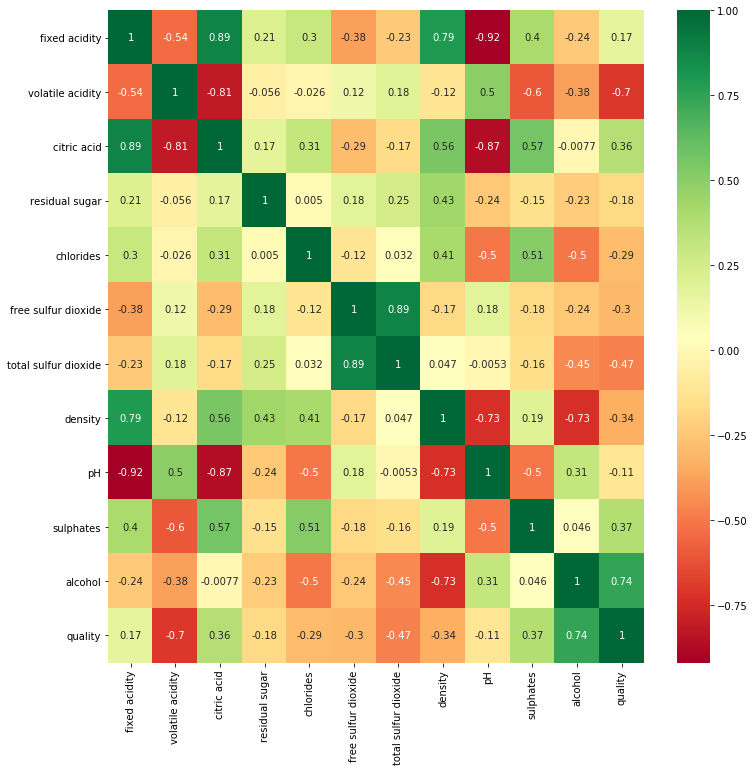

In [11]:
index = corr_matrix.index
plt.figure(figsize = (12,12))
g = sns.heatmap(corr_matrix[index].corr(), annot = True, cmap = "RdYlGn")


In [29]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [30]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [33]:
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])

In [34]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [36]:
X = data.drop('quality', axis =1)
y = data['quality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [42]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train1,y_train)
pred_rfc = rfc.predict(X_test1)

In [45]:
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.92      0.98      0.95       273
           1       0.81      0.53      0.64        47

    accuracy                           0.91       320
   macro avg       0.87      0.75      0.80       320
weighted avg       0.91      0.91      0.90       320



In [46]:
print(confusion_matrix(y_test, pred_rfc))

[[267   6]
 [ 22  25]]


In [48]:
rfc.score(X_train1,y_train)*100

100.0

In [50]:
score=accuracy_score(y_test,pred_rfc)
score*100

91.25

In [52]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train1, y_train)
pred_sgd = sgd.predict(X_test1)

In [54]:
print(classification_report(y_test, pred_sgd))

precision    recall  f1-score   support

           0       0.86      0.99      0.92       273
           1       0.50      0.04      0.08        47

    accuracy                           0.85       320
   macro avg       0.68      0.52      0.50       320
weighted avg       0.81      0.85      0.80       320



In [55]:
print(confusion_matrix(y_test, pred_sgd))

[[271   2]
 [ 45   2]]


In [59]:
svc = SVC()
svc.fit(X_train1,y_train)
pred_svc = svc.predict(X_test)

In [60]:
print(classification_report(y_test, pred_svc))

precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



In [61]:
print(confusion_matrix(y_test, pred_svc))

[[273   0]
 [ 47   0]]


In [64]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [65]:
grid_svc.fit(X_train1,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [66]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [67]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train1, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



In [70]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train1, y = y_train, cv = 10)
rfc_eval.mean()

0.9140255905511812